In [2]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset

In [3]:
DATASET_PATH = Path("./dataset.csv")

if not DATASET_PATH.exists():
    raise FileNotFoundError(f"{DATASET_PATH} not found")
else:
    print(f"{DATASET_PATH} found")

dataset.csv found


In [4]:
df = pd.read_csv(DATASET_PATH)
df = df.set_index(df.columns[0])
COLUMNS = df.columns.values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 1 to 500
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 35.2 KB


__Note__: The following step is __Optional__. We are changing the datatypes of the values to a datatype thatb uses a smaller memory footprint. For 500 rows, it does not make a difference and is shown for demonstration purposes.

In [5]:
df = df.astype({
    COLUMNS[0]: "uint16",
    COLUMNS[1]: "uint16",
    COLUMNS[2]: "uint8",
    COLUMNS[3]: "float16",
    COLUMNS[4]: "float16",
    COLUMNS[5]: "float16",
    COLUMNS[6]: "uint8",
    COLUMNS[7]: "float16"
})

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 1 to 500
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    uint16 
 1   TOEFL Score        500 non-null    uint16 
 2   University Rating  500 non-null    uint8  
 3   SOP                500 non-null    float16
 4   LOR                500 non-null    float16
 5   CGPA               500 non-null    float16
 6   Research           500 non-null    uint8  
 7   Chance of Admit    500 non-null    float16
dtypes: float16(4), uint16(2), uint8(2)
memory usage: 10.7 KB


## Correlation Plot

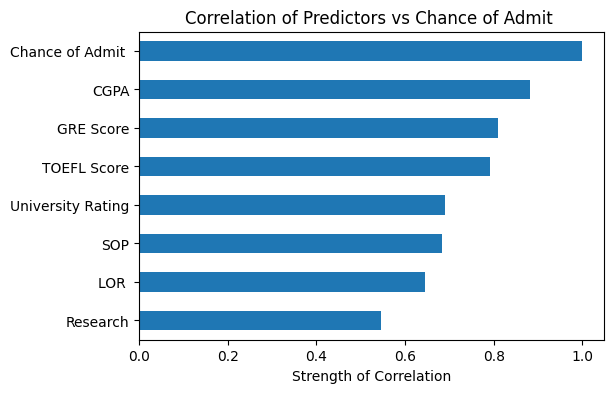

In [6]:
_, ax = plt.subplots(figsize=(6,4))
df.corr("pearson").iloc[: , -1].sort_values(ascending=True).plot(kind="barh", ax=ax)
ax.set_xlabel("Strength of Correlation")
ax.set_title(f"Correlation of Predictors vs {COLUMNS[-1]}")
plt.show()

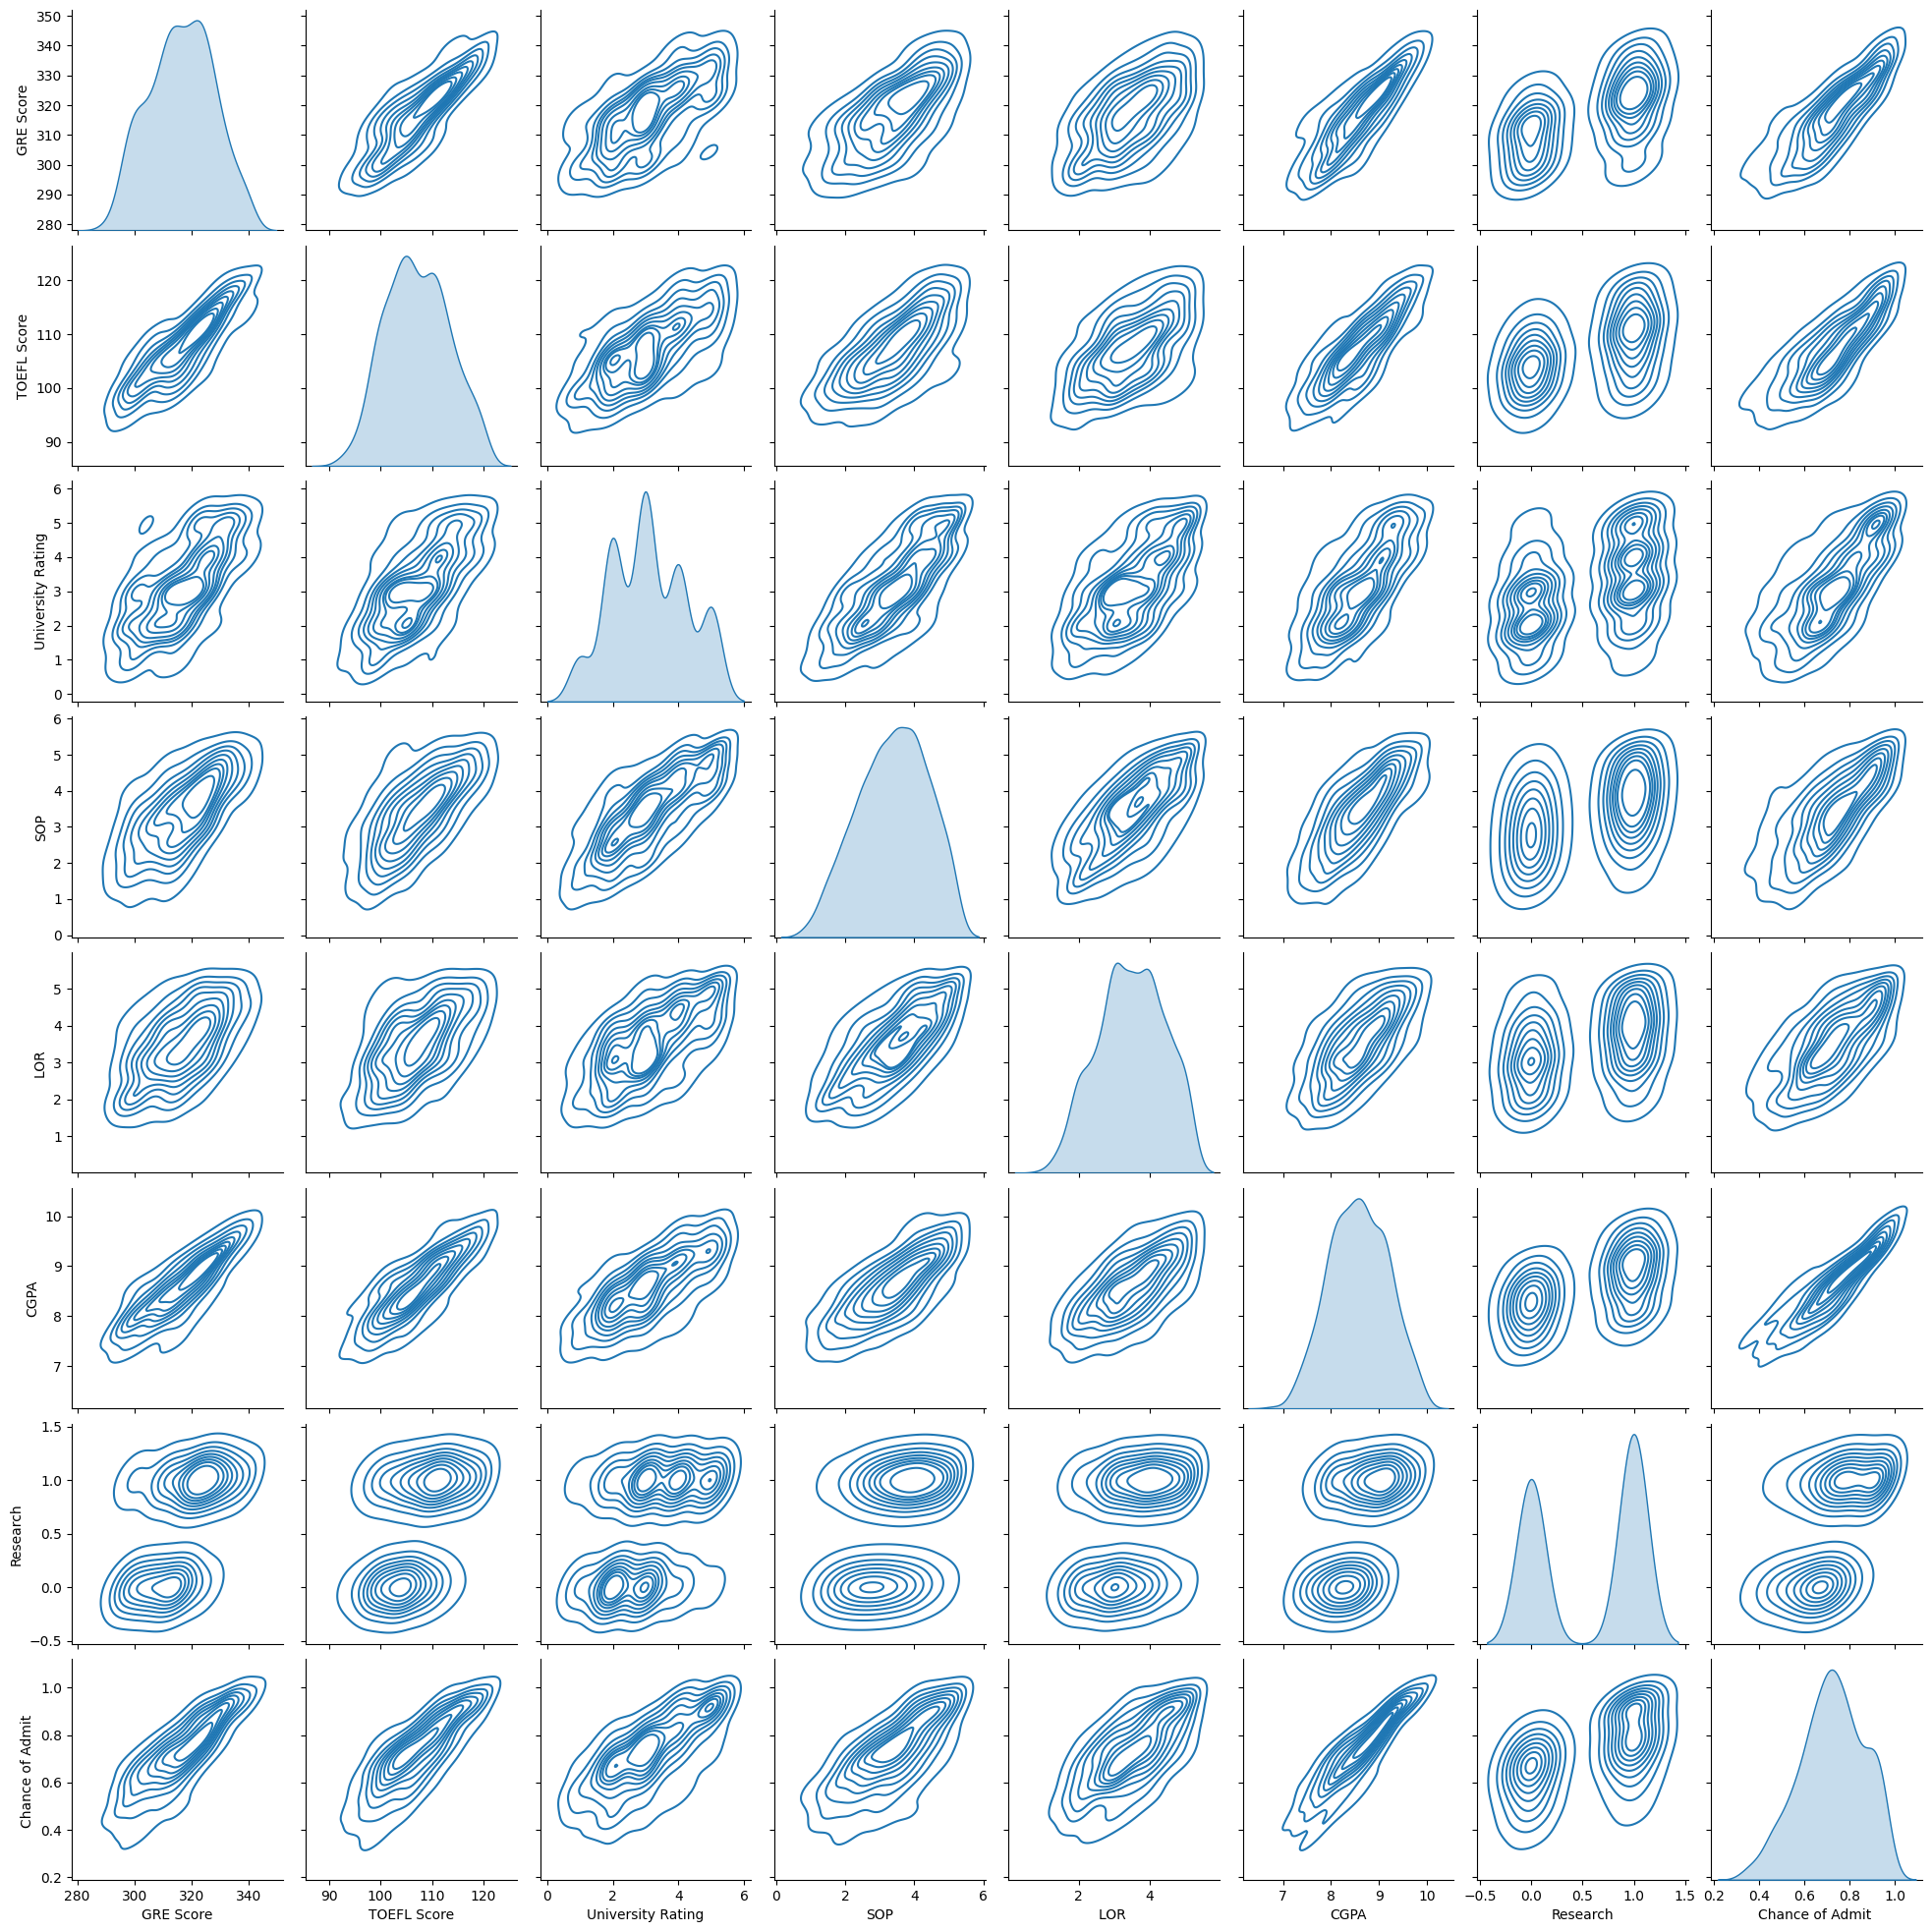

In [7]:
sns.pairplot(
    df,
    diag_kind = "kde",
    kind = "kde"
)

In [8]:
X = df.drop(columns=COLUMNS[-1])
y = df.loc[:, COLUMNS[-1]]

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [15]:
from sklearn.ensemble import RandomForestRegressor

In [76]:
rf_model = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, random_state=42)

In [77]:
rf_model.score(X_test, y_test)

0.8100277870302761

In [78]:
pd.DataFrame({"feature": rf_model.feature_names_in_, "score": rf_model.feature_importances_}).sort_values('score', ascending=False)

,feature,score
5,CGPA,0.842146
0,GRE Score,0.139115
1,TOEFL Score,0.009485
6,Research,0.003387
3,SOP,0.002226
4,LOR,0.002125
2,University Rating,0.001516


## Build a Model with `CGPA` and `GRE Score`

In [84]:
df_reduced = df.loc[:, COLUMNS[[0, 5, 7]]]

In [85]:
X = df_reduced.drop(columns=COLUMNS[-1])
y = df_reduced.loc[:, COLUMNS[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [86]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [100]:
sv_model = SVR(kernel='linear')
rf_model = RandomForestRegressor(n_estimators=50, max_depth=3, random_state=42)

In [101]:
sv_model.fit(X_train, y_train)
print(f"Support Vector Machine Score: {sv_model.score(X_test, y_test)}")

Support Vector Machine Score: 0.7992762669908211


In [105]:
rf_model.fit(X_train, y_train)
print(f"Random Forest Machine Score: {rf_model.score(X_test, y_test)}")

Random Forest Machine Score: 0.8092322680498716


## Build a Model with only `CGPA` as Predictor

In [106]:
df_reduced = df.loc[:, COLUMNS[[5, 7]]]

X = df_reduced.drop(columns=COLUMNS[-1])
y = df_reduced.loc[:, COLUMNS[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [110]:
from sklearn.linear_model import LinearRegression

In [111]:
sv_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=50, max_depth=3, random_state=42)

In [112]:
sv_model.fit(X_train, y_train)
print(f"Support Vector Machine Score: {sv_model.score(X_test, y_test)}")

Support Vector Machine Score: 0.80615234375


In [113]:
rf_model.fit(X_train, y_train)
print(f"Random Forest Machine Score: {rf_model.score(X_test, y_test)}")

Random Forest Machine Score: 0.8092322680498716
